<a href="https://colab.research.google.com/github/Harshini-Manchala/NLP_Lab/blob/main/NLP_Lab2_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install visual-automata

In [10]:
from visual_automata.fa.dfa import VisualDFA
import re

In [11]:
with open("brown_nouns.txt", "r") as f:
    nouns = [line.strip().lower() for line in f if line.strip()]

print(f"Loaded {len(nouns)} nouns. Sample:", nouns[:10])

Loaded 202793 nouns. Sample: ['investigation', 'primary', 'election', 'evidence', 'irregularities', 'place', 'jury', 'presentments', 'charge', 'election']


In [12]:
def analyze_word(word):
    if re.match(r".*(s|x|z|ch|sh)es$", word):
        root = re.sub(r"es$", "", word)
        return f"{root}+N+PL"

    if re.match(r".*ies$", word):
        root = re.sub(r"ies$", "y", word)
        return f"{root}+N+PL"

    if re.match(r".+s$", word) and not re.match(r".*(ss|us|is)$", word):
        root = re.sub(r"s$", "", word)
        return f"{root}+N+PL"

    if word in nouns:
        return f"{word}+N+SG"

    return "Invalid Word"


In [8]:
results = {}
for noun in nouns:
    results[noun] = analyze_word(noun)

for k, v in list(results.items())[:10]:
    print(f"{k} : {v}")

investigation : investigation+N+SG
primary : primary+N+SG
election : election+N+SG
evidence : evidence+N+SG
irregularities : irregularity+N+PL
place : place+N+SG
jury : jury+N+SG
presentments : presentment+N+PL
charge : charge+N+SG
praise : praise+N+SG


In [13]:
output_file = "noun_analysis_output.txt"
with open(output_file, "w") as f:
    for word, analysis in results.items():
        f.write(f"{word} : {analysis}\n")

print(f"Results saved to {output_file}")

Results saved to noun_analysis_output.txt


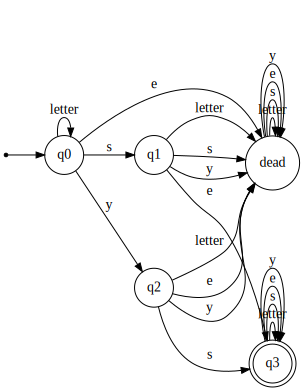

In [14]:
from visual_automata.fa.dfa import VisualDFA

states = {"q0", "q1", "q2", "q3", "dead"}
input_symbols = {"letter", "s", "e", "y"}

transitions = {
    "q0": {"letter": "q0", "s": "q1", "e": "dead", "y": "q2"},
    "q1": {"letter": "dead", "s": "dead", "e": "q3", "y": "dead"},
    "q2": {"letter": "dead", "s": "q3", "e": "dead", "y": "dead"},
    "q3": {"letter": "q3", "s": "q3", "e": "q3", "y": "q3"},
    "dead": {"letter": "dead", "s": "dead", "e": "dead", "y": "dead"}
}

dfa = VisualDFA(
    states=states,
    input_symbols=input_symbols,
    transitions=transitions,
    initial_state="q0",
    final_states={"q3"}
)

dfa.show_diagram(filename="fst_dfa.png", input_str="")